## IMPORT LIBRARIES

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
import time

## DISPLAY THE DATA

In [5]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [6]:
df.tail()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
9995,9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
9996,9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ..."
9999,9999,The Last Boy,2019,87,4.9,10324,NaN,NaN,"['Fantasy', ' Mystery', ' Sci-Fi']",NaN,['Perry Bhandal'],"['Luke Goss', 'Flynn Allen', 'Peter Guinness',...","['With', 'the', ""world's"", 'end', 'imminent,',..."


In [7]:
df.shape

(10000, 13)

In [8]:
df.columns

Index(['Unnamed: 0', 'Movie Name', 'Year of Release', 'Run Time in minutes',
       'Movie Rating', 'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification',
       'Director', 'Stars', 'Description'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,7974.000000,7.085000e+03
mean,4999.50000,2001.413600,110.725000,6.727020,9.279738e+04,59.171432,4.017500e+07
std,2886.89568,18.597804,22.053073,0.821264,1.716509e+05,17.268795,6.748658e+07
min,0.00000,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00
25%,2499.75000,1994.000000,96.000000,6.100000,1.685175e+04,47.000000,2.340000e+06
50%,4999.50000,2007.000000,107.000000,6.700000,3.417950e+04,60.000000,1.693000e+07
75%,7499.25000,2015.000000,121.000000,7.300000,9.154600e+04,72.000000,4.864000e+07
max,9999.00000,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [11]:
df.dtypes

Unnamed: 0               int64
Movie Name              object
Year of Release          int64
Run Time in minutes      int64
Movie Rating           float64
Votes                    int64
MetaScore              float64
Gross                  float64
Genre                   object
Certification           object
Director                object
Stars                   object
Description             object
dtype: object

In [12]:
df.value_counts

<bound method DataFrame.value_counts of       Unnamed: 0                           Movie Name  Year of Release  \
0              0             The Shawshank Redemption             1994   
1              1                        The Godfather             1972   
2              2  Ramayana: The Legend of Prince Rama             1993   
3              3                      The Chaos Class             1975   
4              4                      The Dark Knight             2008   
...          ...                                  ...              ...   
9995        9995                        Golmaal Again             2017   
9996        9996                        Not to Forget             2021   
9997        9997                          Housefull 3             2016   
9998        9998                          A.I. Rising             2018   
9999        9999                         The Last Boy             2019   

      Run Time in minutes  Movie Rating    Votes  MetaScore        Gros

## DATA PREPROCESSING

In [13]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df.columns

Index(['Movie Name', 'Year of Release', 'Run Time in minutes', 'Movie Rating',
       'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification', 'Director',
       'Stars', 'Description'],
      dtype='object')

In [15]:
df.isnull().sum()

Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64

In [16]:
nulCol=['MetaScore','Gross']
df[nulCol].isnull().sum()

MetaScore    2026
Gross        2915
dtype: int64

In [17]:
for i in nulCol:
    df[i].fillna(df[i].mean(), inplace=True)

df[nulCol].isnull().sum()

MetaScore    0
Gross        0
dtype: int64

In [18]:
df["Certification"].fillna("Not Rated", inplace = True)
df.tail()

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
9995,Golmaal Again,2017,140,4.9,10183,59.171432,1.010000e+06,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
9996,Not to Forget,2021,84,4.9,11191,59.171432,4.017500e+07,['Drama'],Not Rated,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,Housefull 3,2016,140,4.9,10308,59.171432,1.160000e+06,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,A.I. Rising,2018,85,4.9,11187,59.171432,4.017500e+07,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ..."
9999,The Last Boy,2019,87,4.9,10324,59.171432,4.017500e+07,"['Fantasy', ' Mystery', ' Sci-Fi']",Not Rated,['Perry Bhandal'],"['Luke Goss', 'Flynn Allen', 'Peter Guinness',...","['With', 'the', ""world's"", 'end', 'imminent,',..."


In [19]:
df.isnull().sum()

Movie Name             0
Year of Release        0
Run Time in minutes    0
Movie Rating           0
Votes                  0
MetaScore              0
Gross                  0
Genre                  0
Certification          0
Director               0
Stars                  0
Description            0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.head(20)

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.000000,2.834000e+07,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,100.000000,1.349700e+08,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,59.171432,4.017500e+07,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,59.171432,4.017500e+07,"['Comedy', ' Drama']",Not Rated,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,84.000000,5.348600e+08,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
5,Schindler's List,1993,195,9.0,1409869,95.000000,9.690000e+07,"['Biography', ' Drama', ' History']",R,['Steven Spielberg'],"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","['In', 'German-occupied', 'Poland', 'during', ..."
6,The Lord of the Rings: The Return of the King,2003,201,9.0,1919908,94.000000,3.778500e+08,"['Action', ' Adventure', ' Drama']",PG-13,['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","['Gandalf', 'and', 'Aragorn', 'lead', 'the', '..."
7,12 Angry Men,1957,96,9.0,834248,97.000000,4.360000e+06,"['Crime', ' Drama']",Approved,['Sidney Lumet'],"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...","['The', 'jury', 'in', 'a', 'New', 'York', 'Cit..."
8,The Godfather Part II,1974,202,9.0,1327069,90.000000,5.730000e+07,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Al Pacino', 'Robert De Niro', 'Robert Duvall...","['The', 'early', 'life', 'and', 'career', 'of'..."
9,Mirror Game,2016,147,9.0,29102,59.171432,4.017500e+07,"['Crime', ' Mystery', ' Thriller']",Not Rated,['Amitabh Reza Chowdhury'],"['Chanchal Chowdhury', 'Masuma Rahman Nabila',...","['Ayna,', 'an', 'alleged', 'chef', 'but', 'a',..."


In [26]:
df.to_csv('data.csv')

## IDENTIFY OUTLIERS

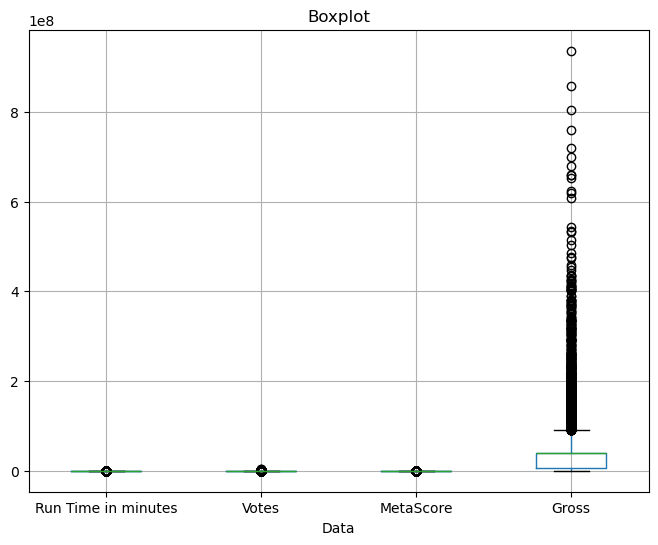

In [132]:
data = ['Run Time in minutes','Votes', 'MetaScore', 'Gross']

plt.figure(figsize=(8, 6))
df[data].boxplot()
plt.title('Boxplot')
plt.xlabel('Data')
plt.show()

In [141]:
features = ['Run Time in minutes','Votes', 'MetaScore', 'Gross']

def limits(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    print("Upper Bound:",upper)   
    print("Lower Bound:",lower)
    return upper, lower

print("Run Time in minutes")
upper1, lower1 = limits(df['Run Time in minutes'])
print("----------------------------------")
print("Votes")
upper2, lower2 = limits(df['Votes'])
print("----------------------------------")
print("MetaScore")
upper3, lower3 = limits(df['MetaScore'])
print("----------------------------------")
print("Gross")
upper4, lower4 = limits(df['Gross'])

Run Time in minutes
Upper Bound: 150.0
Lower Bound: 62.0
----------------------------------
Votes
Upper Bound: 123475.0
Lower Bound: -49353.0
----------------------------------
MetaScore
Upper Bound: 92.5
Lower Bound: 24.5
----------------------------------
Gross
Upper Bound: 93792508.82145378
Lower Bound: -49187505.292872265


In [142]:
outliers = df[(df['Run Time in minutes'] < lower1) | (df['Run Time in minutes'] > upper1)]
df = df.drop(outliers.index)

outliers = df[(df['Votes'] < lower2) | (df['Votes'] > upper2)]
df = df.drop(outliers.index)

outliers = df[(df['MetaScore'] < lower3) | (df['MetaScore'] > upper3)]
df = df.drop(outliers.index)

outliers = df[(df['Gross'] < lower4) | (df['Gross'] > upper4)]
df = df.drop(outliers.index)

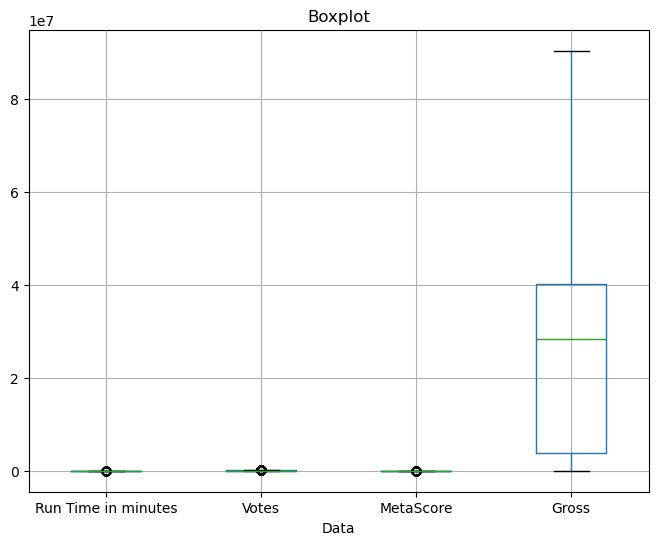

In [143]:
features = ['Run Time in minutes','Votes', 'MetaScore', 'Gross']

plt.figure(figsize=(8, 6))
df[data].boxplot()
plt.title('Boxplot')
plt.xlabel('Data')
plt.show()

In [148]:
df['Movie Rating'] = df['Movie Rating'].astype(str)

# Checking the data types after conversion
print(df.dtypes)

Movie Name              object
Year of Release          int64
Run Time in minutes      int64
Movie Rating            object
Votes                    int64
MetaScore              float64
Gross                  float64
Genre                   object
Certification           object
Director                object
Stars                   object
Description             object
dtype: object


In [149]:
X = df.loc[:, features]
y = df.loc[:, ['Movie Rating']]

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42,test_size=0.20, shuffle=True)
print('X_train : ')
print(X_train.shape)
 
print('X_test : ')
print(X_test.shape)
 
print('y_train : ')
print(y_train.shape)
 
print('y_test : ')
print(y_test.shape)

X_train : 
(5859, 4)
X_test : 
(1465, 4)
y_train : 
(5859, 1)
y_test : 
(1465, 1)


In [150]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size = 0.1, random_state = 42)
print(X_train_cv.shape, X_test_cv.shape, y_train_cv.shape, y_test_cv.shape)

(6591, 4) (733, 4) (6591, 1) (733, 1)


In [151]:
smote_cv = SMOTE(sampling_strategy='minority')

X_SMOTE_cv, y_SMOTE_cv = smote_cv.fit_resample(X_train_cv, y_train_cv)
X_SMOTE_cv = pd.DataFrame(data = X_SMOTE_cv, columns = X_SMOTE_cv.columns)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6